<a href="https://colab.research.google.com/github/wagnerantsilva/posuna-ia-nb/blob/aula2/AULA2_N_GRAMAS_TF_IDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import pack Pandas

In [ ]:
!pip install nltk

In [ ]:
%matplotlib inline
import pandas as pd
import nltk
import string
import importlib

In [ ]:
df = pd.read_csv('https://drive.google.com/u/0/uc?id=1ZlZsxrMHhZZb9ZTYABOiWw7bCPofY6cz&export=download', header=0)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

Laod file IMBd comments

<Axes: title={'center': 'Quantidade por Tipo'}>

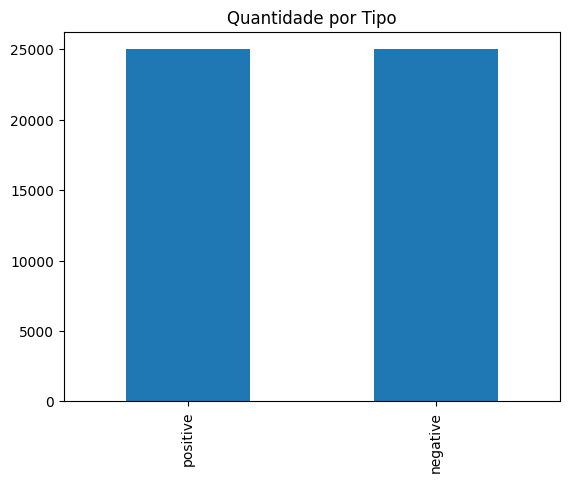

In [ ]:
df["sentiment"].value_counts().plot.bar(title='Quantidade por Tipo',rot=90)

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
exemplo = df['review'].values[0]
print(exemplo)
print(len(exemplo.split()))

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

remover pontuações, stopwords e realizar a contagem de palavras:

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize
stopwords = nltk.corpus.stopwords.words('english')
punctuations = list(string.punctuation)

TAMANHO_MIMINO = 1
IGNORAR = ['...', 'br','.so','\'ll']
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')

def prepara(texto):
    palavras = [i for i in word_tokenize(texto, language='english') if i not in punctuations]
    palavras = [i for i in palavras if i not in stopwords]
    palavras = [i for i in palavras if len(i) > TAMANHO_MIMINO]
    palavras = [i for i in palavras if i not in IGNORAR]
    palavras = [stemmer.stem(i) for i in palavras]
    return palavras

exemplo_preparado = prepara(exemplo)
print(exemplo_preparado)
print(len(exemplo_preparado))

['one', 'review', 'mention', 'watch', 'oz', 'episod', 'hook', 'they', 'right', 'exact', 'happen', 'me.', 'the', 'first', 'thing', 'struck', 'oz', 'brutal', 'unflinch', 'scene', 'violenc', 'set', 'right', 'word', 'go', 'trust', 'show', 'faint', 'heart', 'timid', 'this', 'show', 'pull', 'punch', 'regard', 'drug', 'sex', 'violenc', 'it', 'hardcor', 'classic', 'use', 'word.', 'it', 'call', 'oz', 'nicknam', 'given', 'oswald', 'maximum', 'secur', 'state', 'penitentari', 'it', 'focus', 'main', 'emerald', 'citi', 'experiment', 'section', 'prison', 'cell', 'glass', 'front', 'face', 'inward', 'privaci', 'high', 'agenda', 'em', 'citi', 'home', 'mani', '..', 'aryan', 'muslim', 'gangsta', 'latino', 'christian', 'italian', 'irish', '....', 'scuffl', 'death', 'stare', 'dodgi', 'deal', 'shadi', 'agreement', 'never', 'far', 'away.', 'would', 'say', 'main', 'appeal', 'show', 'due', 'fact', 'goe', 'show', 'would', "n't", 'dare', 'forget', 'pretti', 'pictur', 'paint', 'mainstream', 'audienc', 'forget', 'c

juntaremos novamente o texto para ele voltar a ser uma sentença, e não uma lista de palavras. Como a função pode demorar, vamos utilizar a diretiva %%time para nos mostrar o tempo de processamento.

In [ ]:
%%time
df['review2'] = df['review'].apply(prepara)
df['review2'] = df['review2'].apply(' '.join)

In [ ]:
df.head()

Vamos, primeiramente, separar os dados de treino e teste, sendo 20% para os dados de teste. Para isso, utilizaremos a função train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['review2'], df['sentiment'], test_size=0.2, random_state=0)
print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)
print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)

Agora, criaremos o Bag-of-Words (BoW) para os dados de treino e teste utilizando a função CountVectorizer

In [ ]:
%%time
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(min_df=0.0,max_df=1.0,binary=False,ngram_range=(1,1))
bow_x_train = cv.fit_transform(X_train)
bow_x_test = cv.transform(X_test)
print('bow_x_train shape:',bow_x_train.shape)
print('bow_x_test shape:',bow_x_test.shape)

bow_x_train shape: (40000, 72327)
bow_x_test shape: (10000, 72327)
CPU times: user 6.99 s, sys: 88.8 ms, total: 7.08 s
Wall time: 7.19 s


In [ ]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
ohe_y_train = lb.fit_transform(y_train)
ohe_y_test = lb.fit_transform(y_test)
print('ohe_y_train shape:',ohe_y_train.shape)
print('ohe_y_test shape:',ohe_y_test.shape)

ohe_y_train shape: (40000, 1)
ohe_y_test shape: (10000, 1)


In [ ]:
%%time
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l2', max_iter=500, C=1, random_state=42)
lr.fit(bow_x_train,ohe_y_train.ravel())
print(lr)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
y_predict = lr.predict(bow_x_test)
print("LogReg Score :",accuracy_score(ohe_y_test , y_predict))
print(classification_report(ohe_y_test, y_predict, target_names=['Positive','Negative']))

LogReg Score : 0.8805
              precision    recall  f1-score   support

    Positive       0.88      0.88      0.88      5035
    Negative       0.88      0.88      0.88      4965

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



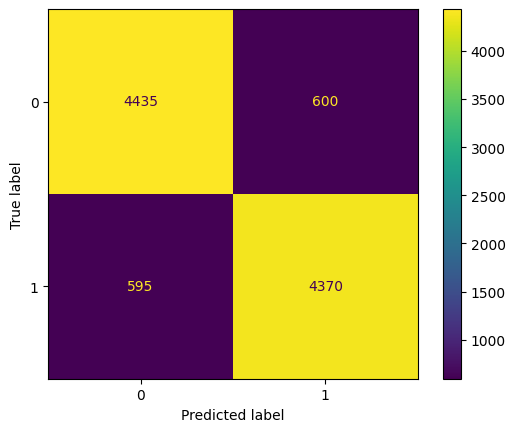

In [65]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(lr, bow_x_test, ohe_y_test, values_format='d');